# ID3 and Naive Bayes


## Importing Packages

In [68]:
#Import packages
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp
from math import pi
from math import sqrt
from sklearn.model_selection import train_test_split

## Reading Dataset

In [69]:
#Read IRIS data
df = pd.read_csv('iris.csv')

## About the Dataset

The famous IRIS dataset contains records for different species of flowers.
1. Each feature represents an attribute of the flower.
2. Each record/data point represents an individual flower, belonging to some species.


### Dataset: Beginning Entries

In [70]:
#Perform exploratory data analysis
#Check head
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Dataset Information

In [71]:
#Check data model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Dataset Description

In [72]:
#Describe data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Dataset: Ending Entries

In [73]:
#Check tail
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Exploratory Data Analysis

### Feature Pairplots

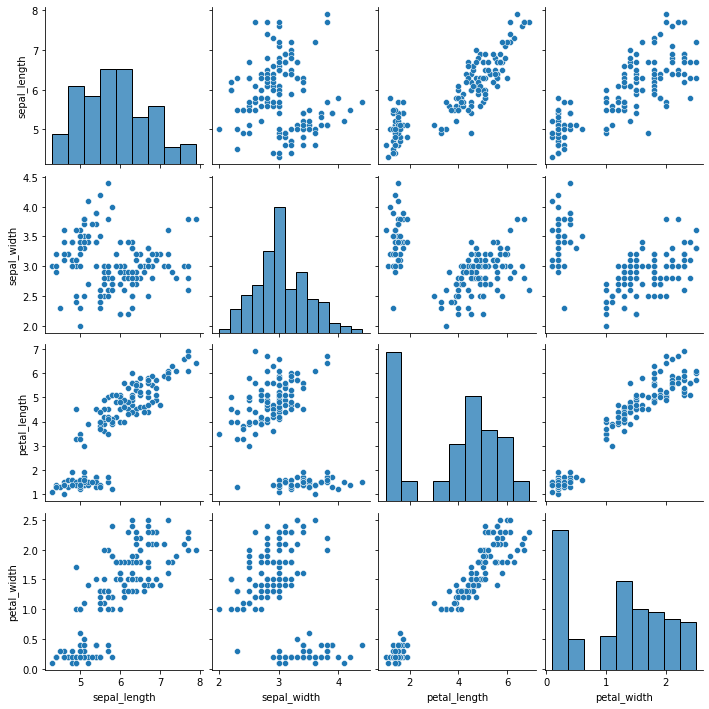

In [74]:
#Check pairplot
sns.pairplot(df)

## Data Preprocessing

### Data Transformation

This section applies transformation on the **species** label to have only two classes: ***Setosa and Non-Setosa***

In [75]:
#Apply transformation
df['species'] = df['species'].apply(lambda x: "non-setosa" if x != "setosa" else "setosa")

### Label Encoding

This section encodes the labels into numerical values. So that, data can be processed further.

In [76]:
#Tranform categorical feature 'species' to numeric form
#1 means 'setosa' and 0 means 'non-setosa'
#Transform feature sex by changing female to 0 and male to 1
df['species'].replace(['setosa','non-setosa'],[1,0],inplace=True)

In [77]:
#Check head again
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Features Correlation Heatmap

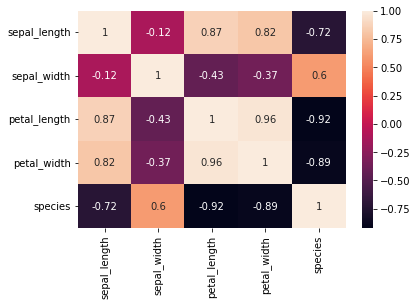

In [78]:
#Check corelation heatmap for numeric features
#1 indicates perfect corelation
plt.figure()
sns.heatmap(df.corr(),annot=True)

## Creating Mini-Batches

This section creates mini-batches of equal ratio of data points of ***Setosa and Non-Setosa***.

In [79]:
#Divide data into 'setosa' and 'non-setosa'
df_setosa = df[df['species']==1] #50
df_non_setosa = df[df['species']==0] #100

In [80]:
#Create 5 smaller datasets with equal ratio of 'setosa' and 'non-setosa' data points
datasets = 5

# Determining  the set size of each smaller dataset
setosa_df_set_size = df_setosa.shape[0] // datasets
non_setosa_df_set_size = df_non_setosa.shape[0] // datasets

dfs = []
for i in range(datasets-1):
  setosa_mini_df = df_setosa[i*setosa_df_set_size:(i+1)*setosa_df_set_size]
  non_setosa_mini_df = df_non_setosa[i*non_setosa_df_set_size:(i+1)*non_setosa_df_set_size]
  dfs.append(pd.concat([setosa_mini_df,non_setosa_mini_df],axis=0))

setosa_mini_df = df_setosa[(i+1)*setosa_df_set_size:]
non_setosa_mini_df = df_non_setosa[(i+1)*non_setosa_df_set_size:]
if not setosa_mini_df.empty or not non_setosa_mini_df.empty:
  dfs.append(pd.concat([setosa_mini_df,non_setosa_mini_df],axis=0))

## Separating Features and Labels

In [81]:
Xs =  []
for df in dfs:
  Xs.append(df[['sepal_length','sepal_width','petal_length','petal_width']])

Ys = []
for df in dfs:
  Ys.append(df[['species']])

## Spliting Data into Training and Testing

This section will split the data into training and testing datasets, for each mini-batch.

In [82]:
test_size = 0.33
random_state = 101

train_test_splits = []
#Create Train and Test splits for all 5 mini datasets
#Split data randomly into Train and Test with 33% as Test size
for Xi, Yi in zip(Xs, Ys):
  train_test_splits.append(train_test_split(Xi, Yi, test_size=test_size, random_state=random_state))

## Defining Methods for Performance Metrics

In [83]:
#Function to calculate accuracy, precision, recall and F1 score
def getPerformanceMetrics(tp,tn,fp,fn):
    a = 0
    p = 0
    r = 0 #Recall = True Positive Rate
    f = 0
    fpr = 0 #False Positve Rate
    a = (tp+tn)/(tp+fp+tn+fn)
    if(tp+fp!=0):#Prevent divide by 0
        p = tp/(tp+fp)
    else:
        p = 0
    if(tp+fn!=0):#Prevent divide by 0
        r = tp/(tp+fn)
    else:
        r = 0
    if(p+r!=0):#Prevent divide by 0
        f = 2*p*r/(p+r)
    else:
        f = 0
    if(tn+fp!=0):#Prevent divide by 0
        fpr = fp/(tn+fp)
    else:
        fpr = 0
    return(a,p,r,f,fpr)

## Methods for Algorithms: ID3 and Naive Bayes

In [84]:
#Function to find average of two numbers
def getMean(x,y):
    average = (x+y)/2
    return average

In [85]:
#Function to calculate mean, standard deviation and length for every training feature
def getTrainFeatureParameters(X_train_full):
    parameters = []
    features = X_train_full.columns
    for feature in features:
        mean = X_train_full[feature].mean()
        std = X_train_full[feature].std()
        if std == 0.0:
            std = 0.000001 #Prevent divide by 0
        length = len(X_train_full[feature])
        parameter = (mean,std,length)
        if feature != 'species':
            parameters.append(parameter)
    return parameters

In [86]:
#Function to find list of mean values of the consecutive elemnts in the number list
def getMeanList(numList):
    length = len(numList) -1
    meanList = [getMean(numList[i],numList[i+1]) for i in range(length)]
    return meanList

In [87]:
#Function to calculate Gaussian PDF
def getProbability(x, mean, std):
    power = (-1/2)*(((x-mean)/std)**2)
    exponent = exp(power)
    if(exponent == 0.0):#Prevent python auto round-off to 0.0 while using math.exp()
        exponent = 0.000001
    pdf = (1/(std*sqrt(2*pi)))*exponent
    return pdf

In [88]:
#Function for calculating entropy
def getEntropy(entity):
    if len(entity) < 2:
        return 0 
    #Calculate count
    count = np.array(entity.value_counts(normalize=True))
    #Calculate entropy
    entropy = -(count * np.log2(count + 1e-6)).sum()
    return entropy

In [89]:
#Function to calculate probabilities and predicting the class for a given row using Naive Bayes
def predictClassNaiveBayes(X_test, Y_test, setosaParams, nonSetosaParams):
    #Convert to matrix
    X_test_matrix = X_test.to_numpy()
    Y_test_matrix = Y_test.to_numpy()
    total_rows = len(X_test_matrix) #data points
    total_columns = len(X_test_matrix[0]) #features
    probSetosa = 0
    probNonSetosa = 0
    Y_predicted = []
    #True Positives
    t_p = 0
    #True Negatives
    t_n = 0
    #False Positives
    f_p = 0
    #False Negatives
    f_n = 0
    for row in range(total_rows):
        probSetosa = 1
        probNonSetosa = 1
        mean_setosa = 0 
        std_setosa = 0
        count_setosa = 0
        mean_non_setosa = 0 
        std_non_setosa = 0
        count_non_setosa = 0
        for column in range(total_columns):
            mean_setosa, std_setosa, count_setosa = setosaParams[column]
            mean_non_setosa, std_non_setosa, count_non_setosa = nonSetosaParams[column]
            probSetosa = probSetosa * getProbability(X_test_matrix[row][column],mean_setosa,std_setosa)
            probNonSetosa = probNonSetosa * getProbability(X_test_matrix[row][column],mean_non_setosa,std_non_setosa)
        #Predict class
        if(probSetosa > probNonSetosa): #It's Setosa!!
            Y_predicted.append(1)
        else: #It's Not Setosa!! --> No Tie Breakers plzzz :D
            Y_predicted.append(0)
        #Calculate loss/error
        if (Y_predicted[-1] == 1 and Y_test_matrix[row][0] == 1): # 1s as 1s
            t_p = t_p + 1
        elif (Y_predicted[-1] == 0 and Y_test_matrix[row][0] == 0): # 0s as 0s
            t_n = t_n + 1
        elif (Y_predicted[-1] == 1 and Y_test_matrix[row][0] == 0): # 0s as 1s
            f_p = f_p + 1
        elif (Y_predicted[-1] == 0 and Y_test_matrix[row][0] == 1): # 1s as 0s
            f_n = f_n + 1
    Y_predicted_df = pd.DataFrame(Y_predicted,columns = ['species'])
    return (Y_predicted_df,t_p,t_n,f_p,f_n)

In [90]:
#Function for calculating information gain
def getInformationGain (entity,target, attribute):
    values = entity[attribute].value_counts(normalize=True)
    entropy_divided = 0
    for v,fr in values.iteritems():
        intermediate = getEntropy(entity[entity[attribute] == v][target])
        entropy_divided += fr * intermediate
    val = getEntropy(entity[target])
    infoGain = val - entropy_divided
    return infoGain

In [91]:
#Function to calculate performance metrics
def calculateMetrics(pred,test_actual):
    t_p = 0
    f_p = 0
    t_n = 0
    f_n = 0
    n = len(pred)
    actual = test_actual.values
    for i in range(0,n):
        if (pred[i] == 1 and actual[i] == 1): # 1s as 1s
            t_p = t_p + 1
        elif (pred[i] == 0 and actual[i] == 0): # 0s as 0s
            t_n = t_n + 1
        elif (pred[i] == 1 and actual[i] == 0): # 0s as 1s
            f_p = f_p + 1
        elif (pred[i] == 0 and actual[i] == 1): # 1s as 0s
            f_n = f_n + 1
    return (t_p,f_p,t_n,f_n)

In [92]:
#Function to calculate performance metrics
def calculateMetrics1(pred,test_actual):
    t_p = 0
    f_p = 0
    t_n = 0
    f_n = 0
    n = len(pred)
    pre = pred.to_numpy()
    act = test_actual.to_numpy()
    for i in range(n):
        if (pre[i] == 1 and act[i] == 1): # 1s as 1s
            t_p = t_p + 1
        elif (pre[i] == 0 and act[i] == 0): # 0s as 0s
            t_n = t_n + 1
        elif (pre[i] == 1 and act[i] == 0): # 0s as 1s
            f_p = f_p + 1
        elif (pre[i] == 0 and act[i] == 1): # 1s as 0s
            f_n = f_n + 1
    return (t_p,f_p,t_n,f_n)

### Class For ID3

In [93]:
# Clas to build the ID3 Decision tree
class Id3TreeBuilder:
    #Initialize Tree Builder
    def __init__(self,entity,aim):
        self.choice = None
        self.entity = entity
        self.aim = aim
        self.attribute_divided = None
        self.child = None
        self.parent = None
    #Create Tree
    def construct(self):
        aim = self.aim
        entity = self.entity
        #Entity list repetative
        if len(entity[aim].unique()) == 1:
            self.choice = entity[aim].unique()[0]
            return None
        #positive scenario
        else:
            highest_ig = 0
            new_entity = pd.DataFrame()
            for attribute in entity.keys():
                #Skip on goal
                if attribute == aim:
                    continue  
                #unqiue values in the attribute
                new_values = entity[attribute].sort_values().unique()
                #mean of the array
                new_values = getMeanList(new_values)
                for patitioner in new_values:
                    name = attribute +" > " + str(patitioner)
                    new_entity[name] = entity[attribute] >  patitioner
            new_entity[aim] = entity[aim]
            # Passing the highest information gain
            for attribute in new_entity.keys():
                #Skip on goal
                if attribute == aim:
                    continue               
                #Get information gain
                info_gain = getInformationGain(new_entity,aim,attribute)
                #Check for highest gain
                if info_gain > highest_ig:
                    highest_ig = info_gain
                    self.attribute_divided = attribute
            self.child = {}
            #Adding child nodes to the ID3 tree
            for value in new_entity[self.attribute_divided].unique():
                index = new_entity[self.attribute_divided] == value
                self.child[value] = Id3TreeBuilder(entity[index],aim)
                self.child[value].construct()
    #Make predictions
    def predict(self,info):
        if self.choice is not None:
            return self.choice
        else:
            #partitioning attributes column
            attribute_divided = self.attribute_divided
            column,value = re.split(" > ",attribute_divided)
            val = float(value)
            child = self.child[(info[column]).astype(float) > val]
            return child.predict(info)

In [94]:
#Class for ID3 model object
class Id3:
    def __init__(self):
        self.root = None
    #Create tree and fit model
    def fit (self,entity,aim):
        self.root = Id3TreeBuilder(entity, aim)
        self.root.construct()

## Combining Labels with Features in Training and Testing Set

In [95]:
X_train_full_s = []
X_test_full_s = []
for train_test_split in train_test_splits:
  X_train_full_s.append(train_test_split[0].join(train_test_split[2]))
  X_test_full_s.append(train_test_split[1].join(train_test_split[3]))

## Defining Bins

Bins are like bags, which will contain a subset of data points.

In [96]:
#Define bins
bins = [5,10,15,20]

## *Naive - Bayes* Algorithm

In [97]:
classes = 2
featureParametersForClasses = [[[] for i in range(classes)] for j in range(datasets)]

In [98]:
#Model fitting on training data
for b in bins:
    for index, X_train_full in enumerate(X_train_full_s):
      X_train_full_c = X_train_full[0:b].copy()  
      for i in range(classes-1,-1,-1):  
        featureParametersForClasses[index][i].append(getTrainFeatureParameters(X_train_full_c[X_train_full_c['species']== i]))

In [99]:
parameters = 6
performance_parameters = [[[] for parameter in range(parameters)] for j in range(datasets)]

In [100]:
#Get predictions and performance parameters for all 5 sets for all 4 bins
for k in range(len(bins)):
    for index, train_test_split in enumerate(train_test_splits):
      pred_parameters = predictClassNaiveBayes(train_test_split[1].copy(),train_test_split[3].copy(),featureParametersForClasses[index][1][k],featureParametersForClasses[index][0][k])
      for parameter in range(parameters-1):
        performance_parameters[index][parameter].append(pred_parameters[parameter])

In [101]:
metrics = 5
performance_metrics = [[[] for metric in range(metrics)] for j in range(datasets)] 

In [102]:
for j in range(len(bins)):
    # for k in range(datasets):
    for index, performance_parameter in enumerate(performance_parameters):
      metrics = getPerformanceMetrics(performance_parameter[1][j],performance_parameter[2][j],performance_parameter[3][j],performance_parameter[4][j])
      for i, metric in enumerate(metrics):
        performance_metrics[index][i].append(metric)

In [103]:
#Display Accuracy for Naive Bayes
accuracies = []
for i in range(len(bins)):
    accuracies.append([performance_metric[0][i]*100 for performance_metric in performance_metrics])
index = 0
print(f'*** Naive Bayes Accuracy ***\n')
for b in bins:
    accuracy = accuracies[index]
    print(f'Bins:{b}')
    print(f'\tNaive Bayes Accuracies (%):{accuracy}')
    print(f'\tMin Acc (%):{min(accuracy)}')
    print(f'\tMax Acc (%):{max(accuracy)}')
    print(f'\tAvg Acc (%):{sum(accuracy)/len(accuracy)}')
    index = index + 1

*** Naive Bayes Accuracy ***

Bins:5
	Naive Bayes Accuracies (%):[100.0, 100.0, 100.0, 100.0, 100.0]
	Min Acc (%):100.0
	Max Acc (%):100.0
	Avg Acc (%):100.0
Bins:10
	Naive Bayes Accuracies (%):[100.0, 100.0, 100.0, 100.0, 100.0]
	Min Acc (%):100.0
	Max Acc (%):100.0
	Avg Acc (%):100.0
Bins:15
	Naive Bayes Accuracies (%):[100.0, 100.0, 100.0, 100.0, 100.0]
	Min Acc (%):100.0
	Max Acc (%):100.0
	Avg Acc (%):100.0
Bins:20
	Naive Bayes Accuracies (%):[100.0, 100.0, 100.0, 100.0, 100.0]
	Min Acc (%):100.0
	Max Acc (%):100.0
	Avg Acc (%):100.0


## Performance Plots

### Accuracy Plot

In [104]:
#Function to plot accuracies
def plotAccuracies(bins,accuracies,title_alog):
    plt.figure(figsize=(10,5),num=title_alog)
    
    S = [i+1 for i in range(len(accuracies[0]))]
    
    axes = plt.axes()
    axes.set_title(title_alog+' - Accuracy Plot')
    axes.set_xlabel('Testing Set')
    axes.set_xticks(S)
    axes.set_ylabel('Accuracy (%)')
    
    for index, bin in enumerate(bins):
      axes.plot(S,accuracies[index],label = f'Bins = {bin}',marker='o',markersize=25 - 5*index)  
              
    axes.legend()
    plt.show()

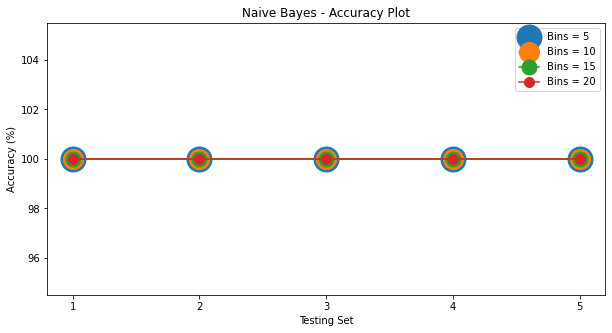

In [105]:
#Plot accuracies for different bins from different testing sets
plotAccuracies(bins,accuracies,'Naive Bayes')

### F1 - Score Plot

In [106]:
#Display F1 Score for Naive Bayes
f1_scores_nb = []
for i in range(len(bins)):
    f1_scores_nb.append([performance_metric[3][i] for performance_metric in performance_metrics])

In [107]:
#Function to plot F1 scores
def plotF1(bins,f1_scores,title_alog):
    plt.figure(figsize=(10,5),num=title_alog)
    
    S = [i+1 for i in range(len(f1_scores[0]))]
    axes = plt.axes()
    axes.set_title(title_alog+' - F1 Score Plot')
    axes.set_xlabel('Testing Set')
    axes.set_xticks(S)
    axes.set_ylabel('F1 Score')
    
    for index, bin in enumerate(bins):
      axes.plot(S,f1_scores[index],label = f'Bins = {bin}',marker='o',markersize=25 - 5*index)  
              
    axes.legend()
    plt.show()

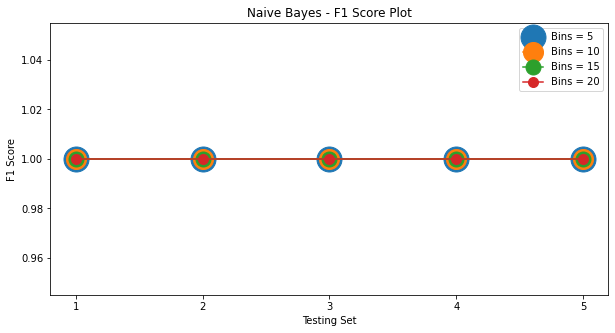

In [108]:
#Plot F1 scores for different bins from different testing sets
plotF1(bins,f1_scores_nb,'Naive Bayes')

### ROC Plot

In [109]:
#Display ROC Curve for Naive Bayes
fpr = []
tpr = []
for i in range(len(bins)):
    fpr.append([0.0] + [performance_metric[4][i] for performance_metric in performance_metrics])
    tpr.append([0.0] + [performance_metric[2][i] for performance_metric in performance_metrics])

In [110]:
#Function to plot F1 scores
def plotROC(tpr,fpr,title_alog):
    plt.figure(figsize=(10,5),num=title_alog)
    
    axes = plt.axes()
    axes.set_title(title_alog+' - ROC Curve Plot')
    axes.set_xlabel('False Positive Rate')
					   
    axes.set_ylabel('True Positive Rate')

    for index, bin in enumerate(bins):
      axes.plot(fpr[index],tpr[index],label = f'Bins = {bin}',marker='o',markersize=25 - 5*index)
             
    axes.legend()
    axes.set_xlim(-0.1,1.1)
    axes.set_ylim(-0.1,1.1)
    plt.show()

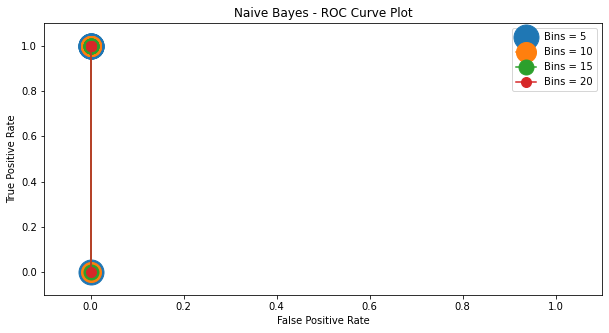

In [111]:
#Plot ROC for different bins from different testing sets
plotROC(tpr,fpr,'Naive Bayes')

## *ID3* Algorithm

In [112]:
y_predict = [[] for i in range(datasets)]
y_pred_test_s = [pd.DataFrame({'species' : [],'id':[]}) for i in range(datasets)]

In [113]:
# initialize and fit model
models = [Id3() for i in range(datasets)]
tps = [[] for i in range(datasets)]
fps = [[] for i in range(datasets)]
tns = [[] for i in range(datasets)]
fns = [[] for i in range(datasets)]

In [114]:
for b in bins:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(datasets):
      models[i].fit(X_train_full_s[i][0:b].copy(), 'species')
      for j, row in X_test_full_s[i].copy().iterrows():
        y_pred_test_s[i]= y_pred_test_s[i].append({'species':models[i].root.predict(row),'id':int(j) }, ignore_index=True)
      (tp,fp,tn,fn) = calculateMetrics(y_pred_test_s[i]['species'][-10:].values, train_test_splits[i][3])
      y_predict[i].append(y_pred_test_s[i]['species'][-10:])
      tps[i].append(tp)
      fps[i].append(fp)
      tns[i].append(tn)
      fns[i].append(fn)

In [115]:
#Get performance metrics
id3_metrics = [[[] for j in range(5)] for i in range(datasets)]

In [116]:
for j in range(len(bins)):
    for i in range(datasets):
      for index, metric in enumerate(getPerformanceMetrics(tps[i][j],tns[i][j],fps[i][j],fns[i][j])):
        id3_metrics[i][index].append(metric)

In [117]:
#Display id3 accuracy
id3accuracies = []
for i in range(len(bins)):
    id3accuracies.append([id3_metrics[j][0][i]*100 for j in range(datasets)])
index = 0
print(f'\n*** ID3 Accuracy ***\n')
for b in bins:
    accuracy = id3accuracies[index]
    print(f'Bins:{b}')
    print(f'\tID3 accuracies (%):{accuracy}')
    print(f'\tMin Acc (%):{min(accuracy)}')
    print(f'\tMax Acc (%):{max(accuracy)}')
    print(f'\tAvg Acc (%):{sum(accuracy)/len(accuracy)}')
    index = index + 1


*** ID3 Accuracy ***

Bins:5
	ID3 accuracies (%):[90.0, 100.0, 80.0, 100.0, 100.0]
	Min Acc (%):80.0
	Max Acc (%):100.0
	Avg Acc (%):94.0
Bins:10
	ID3 accuracies (%):[100.0, 100.0, 80.0, 100.0, 100.0]
	Min Acc (%):80.0
	Max Acc (%):100.0
	Avg Acc (%):96.0
Bins:15
	ID3 accuracies (%):[100.0, 100.0, 100.0, 100.0, 100.0]
	Min Acc (%):100.0
	Max Acc (%):100.0
	Avg Acc (%):100.0
Bins:20
	ID3 accuracies (%):[100.0, 100.0, 100.0, 100.0, 100.0]
	Min Acc (%):100.0
	Max Acc (%):100.0
	Avg Acc (%):100.0


## Performance Plots

### Accuracy Plot

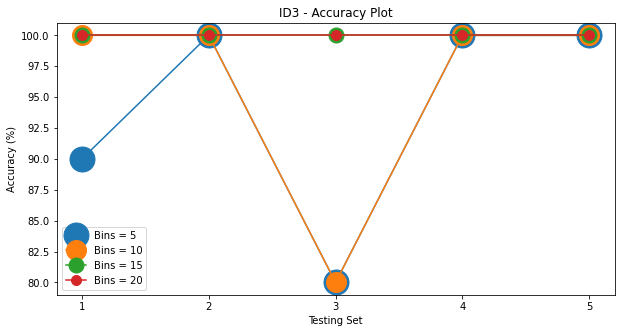

In [118]:
#Plot accuracies for different bins from different testing sets
plotAccuracies(bins,id3accuracies,'ID3')

### F1-Score Plot

In [119]:
#Display F1 Score for ID3
f1_scores_id3 = []
for i in range(len(bins)):
    f1_scores_id3.append([id3_metrics[j][3][i] for j in range(datasets)])

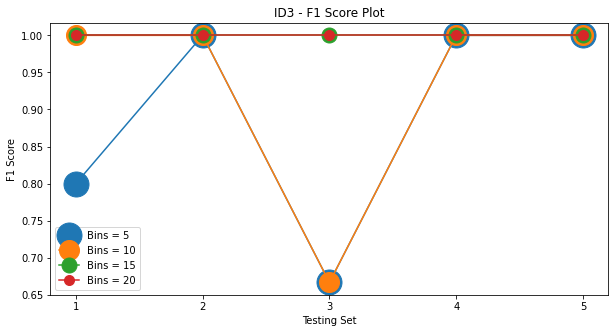

In [120]:
#Plot F1 scores for different bins from different testing sets
plotF1(bins,f1_scores_id3,'ID3')

### ROC Plot

In [121]:
#Display ROC Curve for ID3
fpr_id3 = []
tpr_id3 = []
for i in range(len(bins)):
    fpr_id3.append([0.0] + [id3_metrics[j][4][i] for j in range(datasets)])
    tpr_id3.append([0.0] + [id3_metrics[j][2][i] for j in range(datasets)])

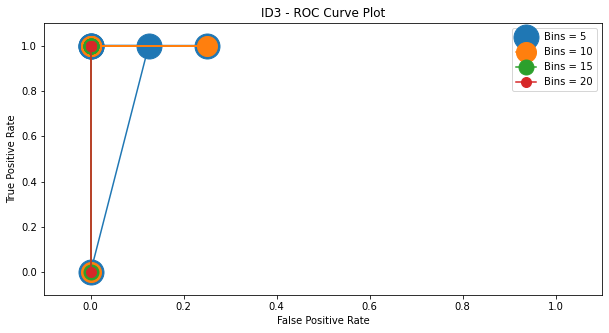

In [122]:
#Plot ROC for different bins from different testing sets
plotROC(tpr_id3,fpr_id3,'ID3')

## Performing Naive Bayes, based on predictions of ID3

In [123]:
#Using ID3 test predictions as test truth for Naive Bayes
NB_truths = [[[] for j in range(6)] for i in range(datasets)]

In [124]:
#Get predictions and performance parameters for all 5 sets for all 4 bins
for k in range(len(bins)):
    for i in range(datasets):
      id3_out = pd.DataFrame(y_predict[i][k],columns=['species'])
      truths = predictClassNaiveBayes(train_test_splits[i][1].copy(),id3_out,featureParametersForClasses[i][1][k],featureParametersForClasses[i][0][k])  
      for index, truth in enumerate(truths):
        NB_truths[i][index].append(truth)

In [125]:
#Get performance metrics
NB_performances = [[[] for j in range(5)] for i in range(datasets)]

In [126]:
for j in range(len(bins)):
    for i in range(datasets):
      performances = getPerformanceMetrics(NB_truths[i][1][j], NB_truths[i][2][j], NB_truths[i][3][j], NB_truths[i][4][j])
      for index, performance in enumerate(performances):
        NB_performances[i][index].append(performance)

In [127]:
#Display F1 Score for Naive Bayes Truth
f1_scores_NBT = []
for i in range(len(bins)):
    f1_scores_NBT.append([NB_performances[j][4][i] for j in range(datasets)])

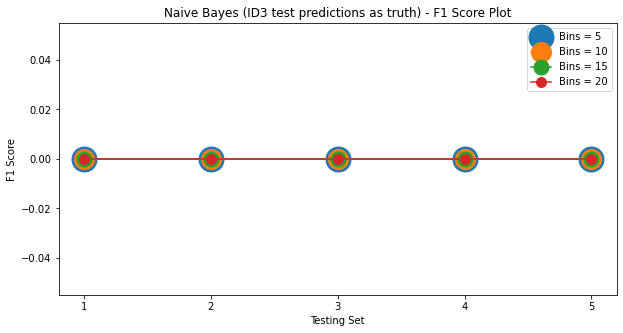

In [128]:
#Plot F1 scores for different bins from different testing sets
plotF1(bins,f1_scores_NBT,'Naive Bayes (ID3 test predictions as truth)')

In [129]:
#Using Naive Bayes test predictions as test truth for nb
test_truth_NB = [[[] for i in range(4)] for j in range(datasets)]

In [130]:
for b in range(0,len(bins)):
    for i in range(datasets):
      metrics = calculateMetrics1(y_predict[i][b],performance_parameters[i][0][b].squeeze())
      for index, metric in enumerate(metrics):
        test_truth_NB[i][index].append(metric)

In [131]:
#Get performance metrics
id3_performance_metrics = [[[] for i in range(5)] for j in range(datasets)]

In [132]:
for j in range(len(bins)):
    for i in range(datasets):
      performance_metrics = getPerformanceMetrics(test_truth_NB[i][0][j],test_truth_NB[i][2][j], test_truth_NB[i][1][j], test_truth_NB[i][3][j])
      for index, performance_metric in enumerate(performance_metrics):
        id3_performance_metrics[i][index].append(performance_metric)

In [133]:
#Display F1 Score for ID3 Truth
f1_scores_ID3T = []
for i in range(len(bins)):
    f1_scores_ID3T.append([id3_performance_metrics[j][3][i] for j in range(datasets)])

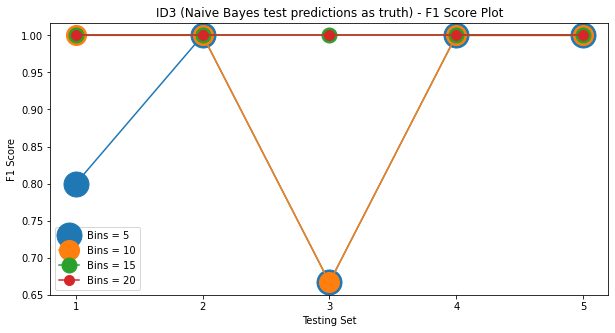

In [134]:
#Plot F1 scores for different bins from different testing sets
plotF1(bins,f1_scores_ID3T,'ID3 (Naive Bayes test predictions as truth)')